<a href="https://colab.research.google.com/github/aryashivakumar/dataScience/blob/main/Unit6/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, elpd_loo is used to compare two models, more positive is better.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when our model seems to predict the data we have on hand well--but those predictions don't generalize to new, similar data.

**Task3**:

How do we mitigate overfitting?

We can mitigate overfitting by utilizing weakly informative or regularizing priors.

**Task4**:

How do we mitigate underfitting?

use elpd_loo to pick between multiple models. You should pick the most positive elpd_loo.

**Task5**:

Why would we want more than one predictor in a model?

If there are multiple factors that can affect the response, the mroe useful the predictors, the higher the elpd_loo

**Task6**:

Can we have too many predictors? How would we know?

Yes it is possible, we would know if the excess results in overfitting, which would be a problem because the model wouldn't be able to make accurate predictions on new data.

**Task7**:

What is variable selection, and how does it work?

When using multiple predictors, some logical questions arise:

do we really need multiple predictors?
if so, how many do we need?
and which ones? Are some better than others? The same as others?

Creating various models that have different combinations and then compare their elpd_loo with each other to figure out which one is the best.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

They are all linear which allow for the ability to understand correlation between them.

The first one are the same slope, do not differ
Each group creates a different relationship
The variables in the last one allows for differnt relationships between the groups

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Create multiple plots, it is not possible to visualize the entire model. Casual diagrams are ways to visualize multiple lintear regression models.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install git+https://github.com/pydata/xarray.git

import xarray as xr


!pip install bambi


import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-xubwpxu_
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-xubwpxu_
  Resolved https://github.com/pydata/xarray.git to commit 060a91791ec963089f66667b55e431ad549ea475
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2026.1.1.dev1+g060a91791-py3-none-any.whl size=1403228 sha256=f2ab70baf25006e352e8ce4a95c97c31ba0555c84f22f29229638ec2beeb7325
  Stored in directory: /tmp/pip-ephem-wheel-cache-33t5b_j0/wheels/85/31/4d/1461a0a89ce43cb05e88257f443831a509560bcc4d5ebe482c
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.12.0
    Uninstalling xarray-2025.12.0:
      Successfully uninstalled xarray-2025.12.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 15.7 MB/s eta 0:00:00


In [3]:
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [4]:

bb = bb.query('MP > 600')
bb = bb.query('`FT%` != 1.0')
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

In [5]:
model_basketball = bmb.Model("FGp ~ FTp + Pos", data=bb)
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

Output()

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

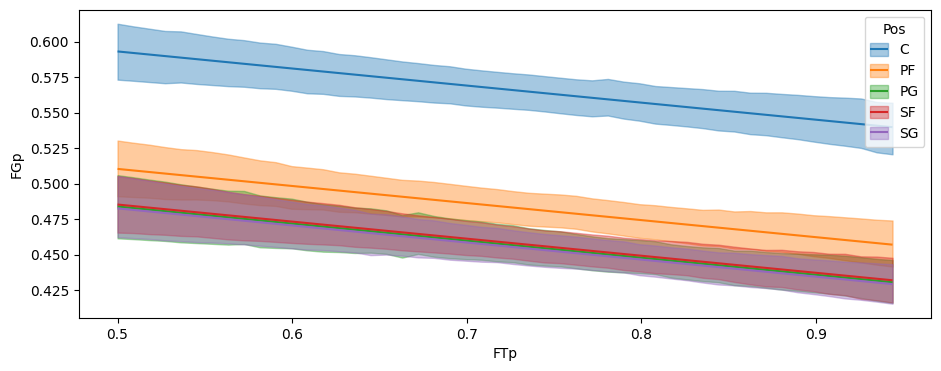

In [8]:
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

In [9]:

model_basketball_h = bmb.Model("FGp ~ (FTp|Pos)", data=bb)
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

Output()

ERROR:pymc.stats.convergence:There were 23 divergences after tuning. Increase `target_accept` or reparameterize.


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

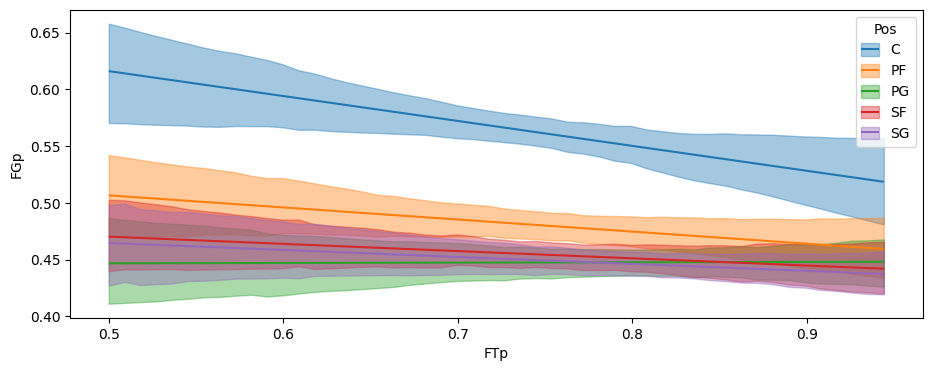

In [10]:

bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [6]:
model_bb_interq = bmb.Model("`FGp` ~ `FTp` + `Pos` + `FTp`:`Pos`", data=bb)
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})

Output()

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

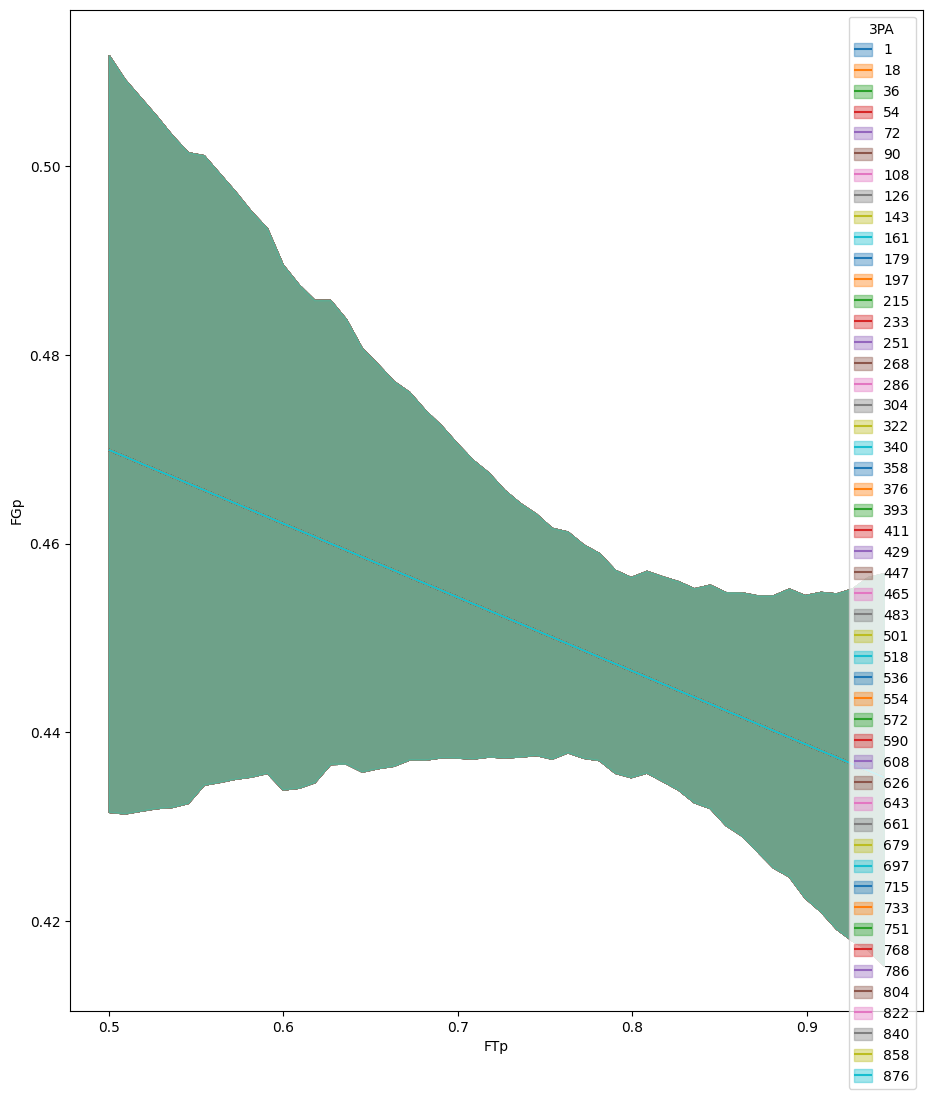

In [11]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

In [12]:
model_bb_all_inter = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb)
idata_bb_all_inter = model_bb_all_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

In [13]:
model_bb_3pa_pos_inter = bmb.Model("FGp ~ FTp + Pos + `3PA` + `3PA`:Pos", data=bb)
idata_bb_3pa_pos_inter = model_bb_3pa_pos_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

In [14]:
cmp_df = az.compare(
    {
        "FTp + Pos": idata_basketball,
        "FTp|Pos (hierarchy)": idata_basketball_h,
        "FTp + Pos + FTp:Pos": idata_bb_interq,
        "FTp + Pos + 3PA + all interactions": idata_bb_all_inter,
        "FTp + Pos + 3PA + 3PA:Pos": idata_bb_3pa_pos_inter
    }
)
cmp_df

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
FTp + Pos + 3PA + 3PA:Pos,0,529.941563,12.724539,0.000000,5.642218e-01,15.825843,0.000000,False,log
FTp + Pos + 3PA + all interactions,1,529.170420,18.909662,0.771143,4.357782e-01,15.004672,3.697771,True,log
FTp + Pos + FTp:Pos,2,509.289963,13.952263,20.651601,0.000000e+00,16.787368,7.658799,True,log
FTp|Pos (hierarchy),3,507.694979,14.431146,22.246584,1.229458e-16,17.053719,7.157652,False,log
FTp + Pos,4,507.315127,8.298173,22.626436,5.396239e-12,16.131808,6.815309,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

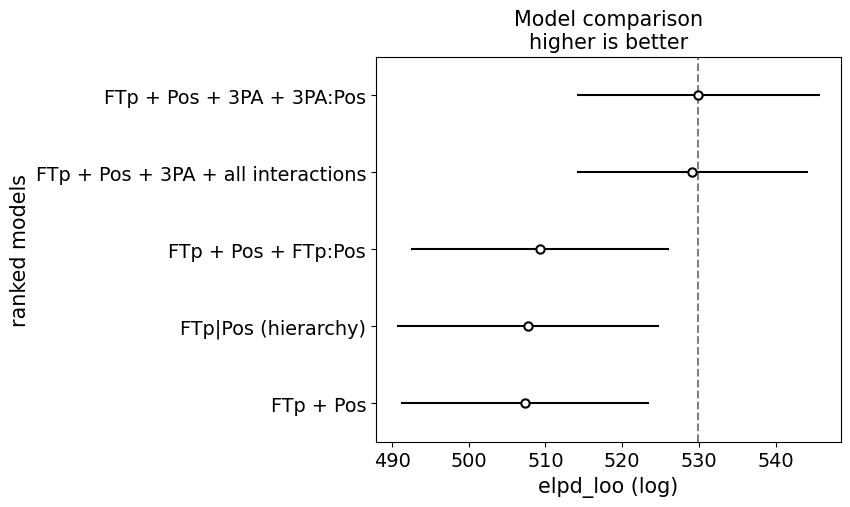

In [15]:
az.plot_compare(cmp_df)

The interaction between 3pa:pos appearst to be the best, most liekley because the relationship between 3 point attempts and the position of where they are attempted matter the most.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [16]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [17]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


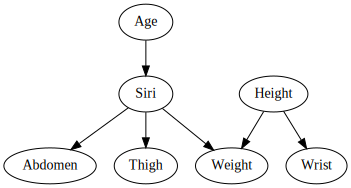

In [22]:

#single predictor causal diagrm
dag_b = gv.Digraph(comment='bodyfat_dag') #b for bikes

dag_b.node('A', 'Age')
dag_b.node('W','Weight')
dag_b.node('B', 'Abdomen')
dag_b.node('T','Thigh')
dag_b.node('H','Height')
dag_b.node('R', 'Wrist')
dag_b.node('S','Siri')

dag_b.edges(['AS','SB','ST','SW','HW','HR'])

dag_b